In [1]:
from gsmmutils.experimental.exp_matrix import ExpMatrix
from gsmmutils.experimental.biomass import Biomass
from gsmmutils.stats.stats import StatisticalAnalysis
from gsmmutils import DATA_PATH
import pandas as pd
from gsmmutils.graphics.plot import boxplot, hist, qqplot
from pprint import pprint

      lutein      chlb       chla  carotene     N     P  salinity  aeration
1   0.892282  2.106221   3.663436  0.506452   7.5  0.05      35.0     600.0
2   0.785577  2.016852   3.260304  0.386454  12.5  0.05      35.0     600.0
3   1.150453  3.865616   5.817795  0.590828   7.5  0.15      35.0     600.0
4   1.110615  3.433815   5.475308  0.547626  12.5  0.15      35.0     600.0
5   1.058453  2.382628   3.687955  0.386858   7.5  0.05      89.0     600.0
6   0.637941  1.569082   2.351200  0.305583  12.5  0.05      89.0     600.0
7   1.251329  4.439353   7.325148  0.700472   7.5  0.15      89.0     600.0
8   1.108868  4.309365   6.183318  0.491775  12.5  0.15      89.0     600.0
9   0.373730  1.081044   1.192205  0.123815   7.5  0.05      35.0     800.0
10  0.361253  1.098063   1.138083  0.120510  12.5  0.05      35.0     800.0
11  0.849766  2.064795   1.941531  0.429138   7.5  0.15      35.0     800.0
12  0.783528  2.224879   3.436618  0.264730  12.5  0.15      35.0     800.0
13  0.529873

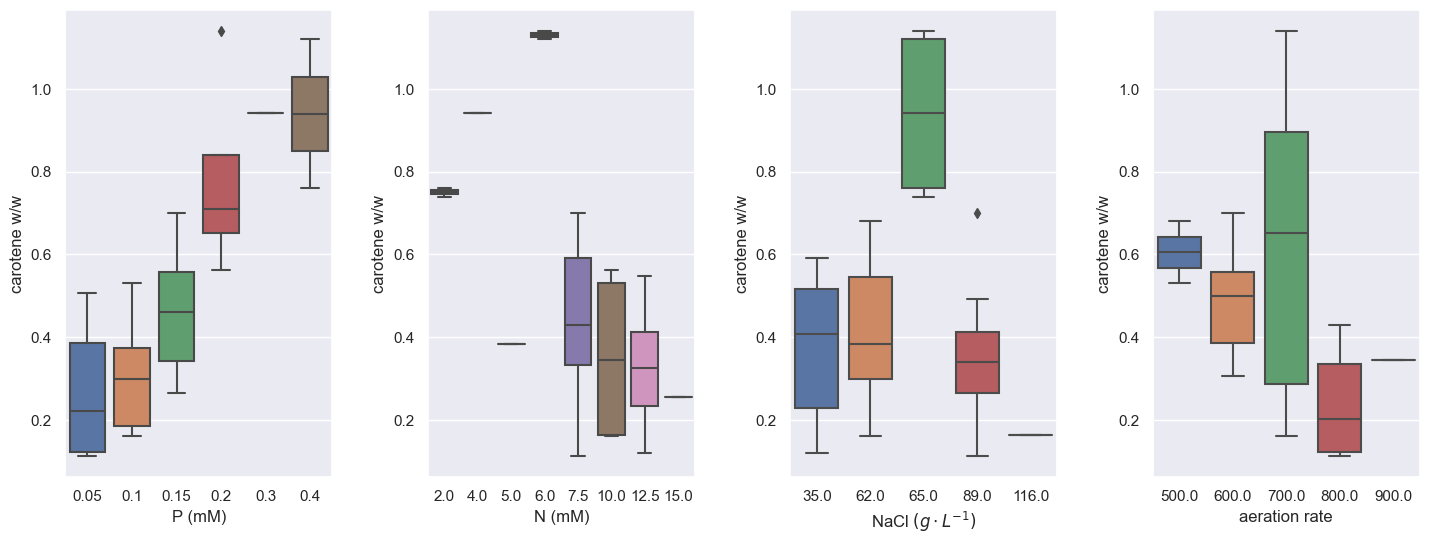

In [2]:
biomass = Biomass("e_Biomass__cytop", f"{DATA_PATH}/experimental/Biomass_exp_composition.xlsx")
matrix = ExpMatrix(f"{DATA_PATH}/experimental/Matriz- DCCR Dunaliella salina_dfba_new.xlsx")
matrix.conditions = "Resume"
matrix.conditions = matrix.conditions.rename({"[N] mmol": "N", "[P] mmol": "P", "Salinity g/L": "salinity", "Aeration rate": "aeration", 'growth_rate': 'umax', 'Productivity (g/L.h)': 'Pmax', 'Biomass (gDW/L)': 'biomass'}, axis=1)
m = pd.concat([biomass.biomass_matrix['macromolecules'], matrix.conditions[["N", "P", "salinity", "aeration"]]], axis=1)
m = m.dropna()

m = pd.concat([biomass.biomass_matrix['pigments'].filter(regex='.*mean.*',axis=1), matrix.conditions[["N", "P", "salinity", "aeration"]]], axis=1)
m = m.dropna()
m.rename(columns = {"B-carotene (mean)": 'carotene', "Lutein (mean)": 'lutein', "Chlorophyll a (mean)": 'chla', "Chlorophyll b (mean)": 'chlb'}, inplace=True)
# m = m.loc[~m.index.str.startswith("N")]
print(m)
boxplot(m, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['carotene'], to_show=True, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
        , y_labels={'carotene': 'carotene w/w'})

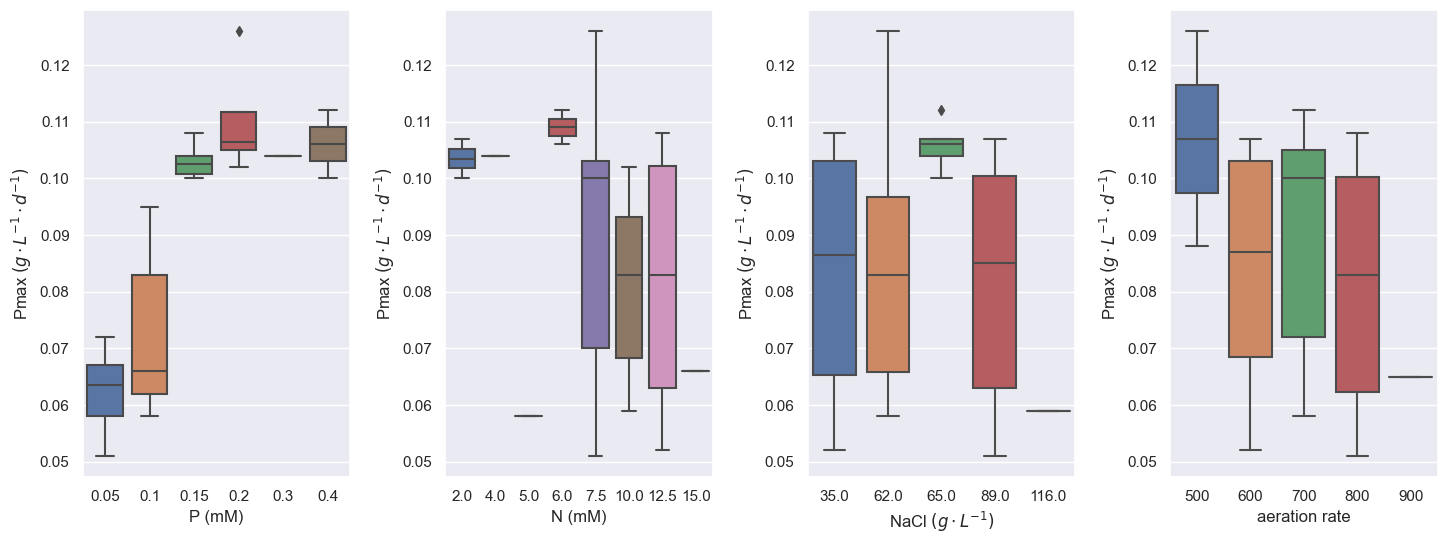

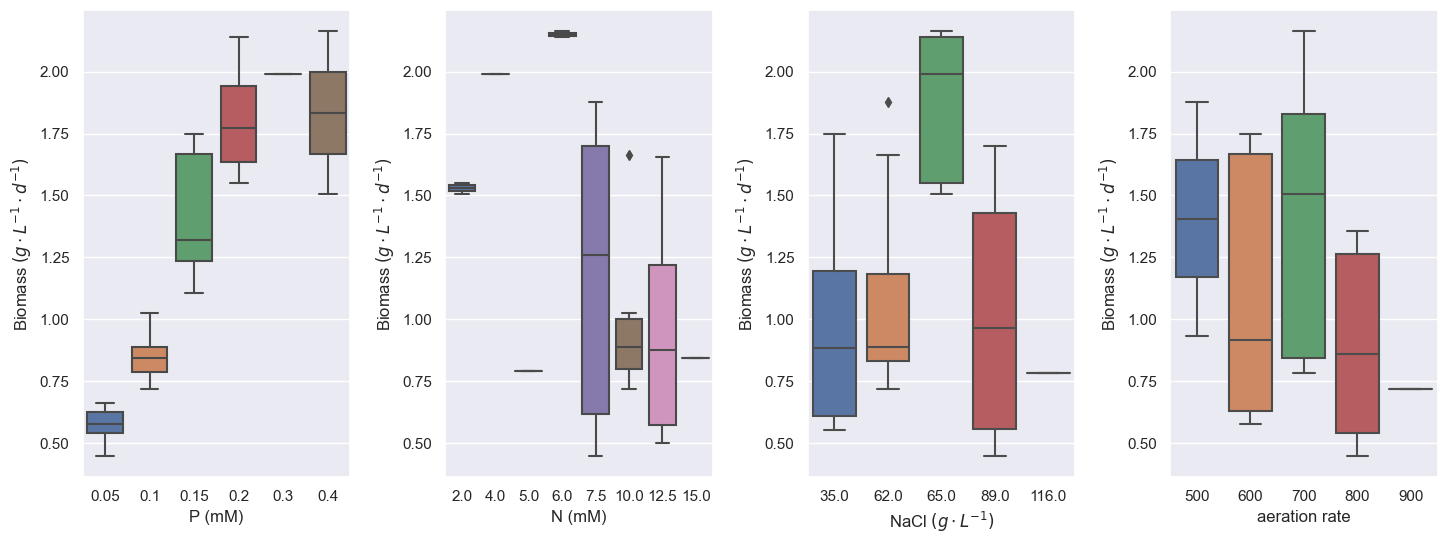

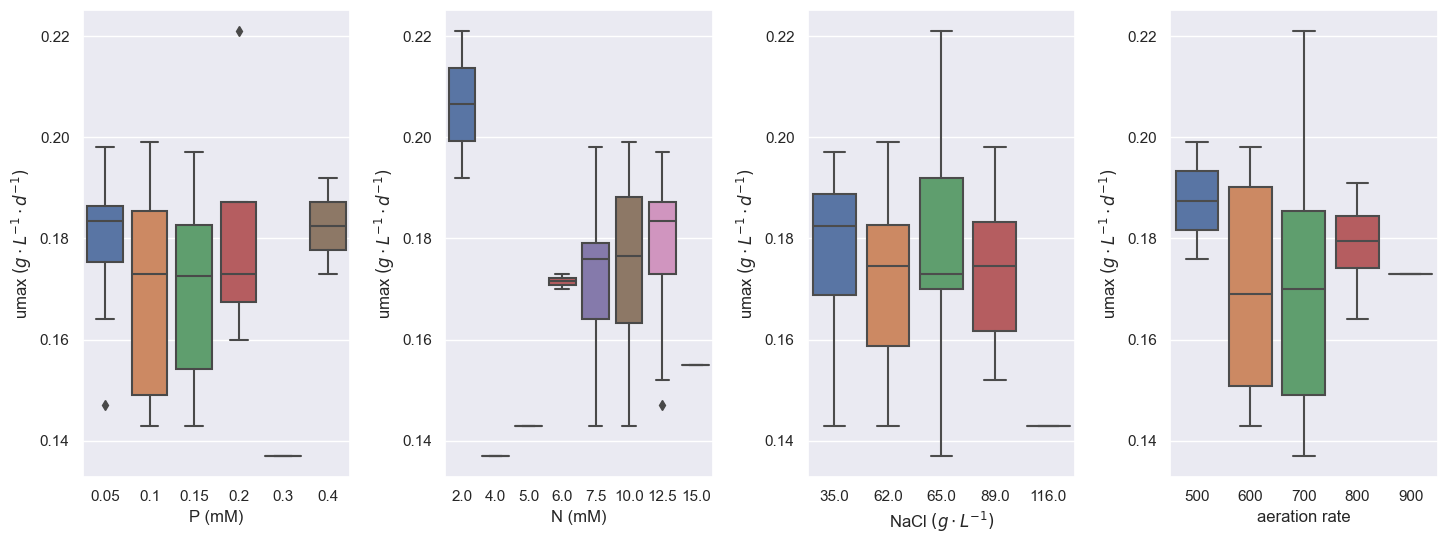

                  biomass ~ P                  
             sum_sq    df          F        PR(>F)
P         5.422548   1.0  54.991238  4.472123e-08
Residual  2.761010  28.0        NaN           NaN 
 ##################################################
            sum_sq    df          F        PR(>F)
P         5.422548   1.0  54.991238  4.472123e-08
Residual  2.761010  28.0        NaN           NaN


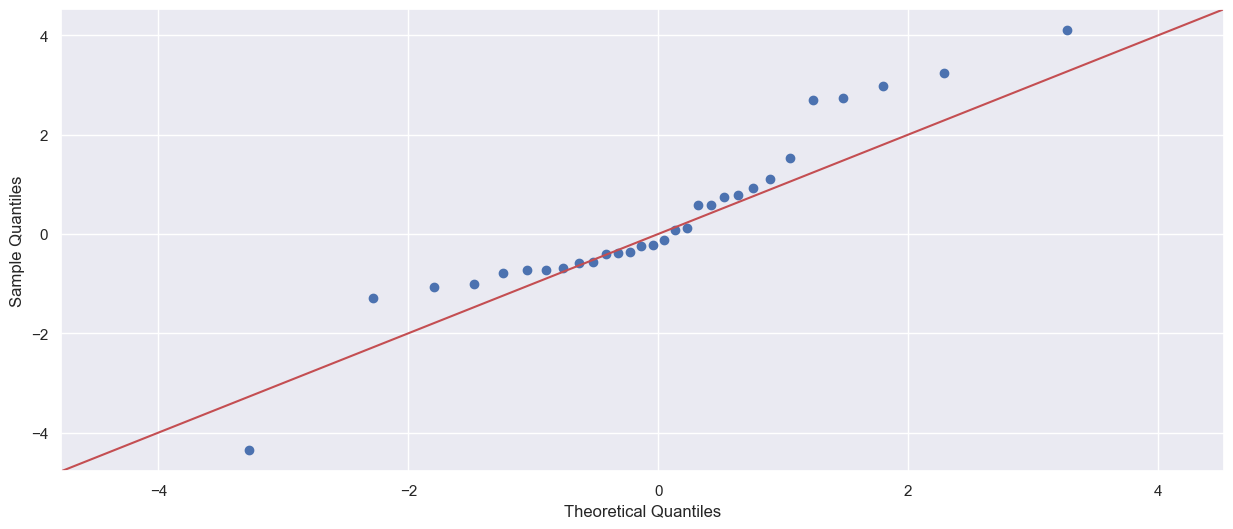

In [5]:
def stats(matrix):
    matrix.conditions = matrix.conditions.rename({"[N] mmol": "N", "[P] mmol": "P", "Salinity g/L": "salinity", "Aeration rate": "aeration", 'growth_rate': 'umax', 'Productivity (g/L.h)': 'Pmax', 'Biomass (gDW/L)': 'biomass'}, axis=1)
    
    boxplot(matrix.conditions, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['Pmax'], to_show=True, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
                            , y_labels={'Pmax': 'Pmax $(g \cdot L^{-1} \cdot d^{-1})$'})
    boxplot(matrix.conditions, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['biomass'], to_show=True, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
            , y_labels={'biomass': 'Biomass $(g \cdot L^{-1} \cdot d^{-1})$'})
    boxplot(matrix.conditions, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['umax'], to_show=True, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
            , y_labels={'umax': 'umax $(g \cdot L^{-1} \cdot d^{-1})$'})
    stats = StatisticalAnalysis(matrix.conditions)
    anova_table, model = stats.anova('biomass ~ P')
    print(anova_table)
    # hist(matrix.conditions, ['biomass'], title='Biomass', xlabel='Biomass $(g \cdot L^{-1})$', ylabel='Frequency')
    # hist(matrix.conditions, ['Pmax'], title='Maximum Productivity', xlabel='Pmax $(g \cdot L^{-1} \cdot h^{-1})$', ylabel='Frequency')
    # hist(matrix.conditions, ['umax'], title='Growth Rate', xlabel='Biomass $(h^{-1})$', ylabel='Frequency')
    qqplot(model, to_show=True)
biomass = Biomass("e_Biomass__cytop", f"{DATA_PATH}/experimental/Biomass_exp_composition.xlsx")
matrix = ExpMatrix(f"{DATA_PATH}/experimental/Matriz- DCCR Dunaliella salina_dfba_new.xlsx")
matrix.conditions = "Resume"
matrix.conditions = matrix.conditions.rename({"[N] mmol": "N", "[P] mmol": "P", "Salinity g/L": "salinity", "Aeration rate": "aeration", 'growth_rate': 'umax', 'Productivity (g/L.h)': 'Pmax', 'Biomass (gDW/L)': 'biomass'}, axis=1)
matrix.conditions = matrix.conditions.loc[(~matrix.conditions.index.str.startswith("Xi")) 
& (~matrix.conditions.index.str.startswith("Yimei")) & (~matrix.conditions.index.str.startswith("fachet"))]
stats(matrix)
m = pd.concat([biomass.biomass_matrix['macromolecules'], matrix.conditions[["N", "P", "salinity", "aeration"]]], axis=1)
m = m.dropna()
# boxplot(m, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['Protein'], to_show=True, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
#     , y_labels={'Protein': 'Protein w/w'})
# boxplot(m, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['Carbohydrate'], to_show=True, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
#     , y_labels={'Carbohydrate': 'Carbohydrate w/w'})
# boxplot(m, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['Lipid'], to_show=True, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
#     , y_labels={'Lipid': 'Lipid w/w'})

In [15]:
matrix.conditions = matrix.conditions.rename({"[N] mmol": "N", "[P] mmol": "P", "Salinity g/L": "salinity", "Aeration rate": "aeration", 'growth_rate': 'umax', 'Productivity (g/L.h)': 'Pmax', 'Biomass (gDW/L)': 'biomass'}, axis=1)
tmp = matrix.conditions[['P', 'N', 'salinity', 'aeration', 'Pmax', 'biomass', 'umax']]
tmp.corr()

,P,N,salinity,aeration,Pmax,biomass,umax
P,1.000000,-0.553792,0.003975,-0.045283,0.702762,0.814012,-0.034572
N,-0.553792,1.000000,-0.007121,0.030144,-0.313578,-0.437670,-0.061175
salinity,0.003975,-0.007121,1.000000,0.007245,-0.110660,0.009672,-0.164381
aeration,-0.045283,0.030144,0.007245,1.000000,-0.241975,-0.231058,0.015573
Pmax,0.702762,-0.313578,-0.110660,-0.241975,1.000000,0.883359,0.155656
biomass,0.814012,-0.437670,0.009672,-0.231058,0.883359,1.000000,-0.178132
umax,-0.034572,-0.061175,-0.164381,0.015573,0.155656,-0.178132,1.000000


In [34]:
m = pd.concat([biomass.biomass_matrix['macromolecules'], matrix.conditions[["N", "P", "salinity", "aeration"]]], axis=1)
stats = StatisticalAnalysis(m)

In [35]:
stats.get_correlation()

,Protein,Carbohydrate,Lipid,N,P,salinity,aeration
Protein,1.00,0.14,0.33,0.06,0.24,-0.39,0.23
Carbohydrate,0.14,1.00,0.02,-0.21,0.46,-0.35,-0.16
Lipid,0.33,0.02,1.00,-0.34,0.16,-0.56,-0.09
N,0.06,-0.21,-0.34,1.00,-0.55,-0.01,0.03
P,0.24,0.46,0.16,-0.55,1.00,0.00,-0.05
salinity,-0.39,-0.35,-0.56,-0.01,0.00,1.00,0.01
aeration,0.23,-0.16,-0.09,0.03,-0.05,0.01,1.00


In [37]:
stats = StatisticalAnalysis(m)
cor = stats.get_correlation()
print(cor)

              Protein  Carbohydrate  Lipid     N     P  salinity  aeration
Protein          1.00          0.14   0.33  0.06  0.24     -0.39      0.23
Carbohydrate     0.14          1.00   0.02 -0.21  0.46     -0.35     -0.16
Lipid            0.33          0.02   1.00 -0.34  0.16     -0.56     -0.09
N                0.06         -0.21  -0.34  1.00 -0.55     -0.01      0.03
P                0.24          0.46   0.16 -0.55  1.00      0.00     -0.05
salinity        -0.39         -0.35  -0.56 -0.01  0.00      1.00      0.01
aeration         0.23         -0.16  -0.09  0.03 -0.05      0.01      1.00


In [38]:
from matplotlib import pyplot as plt
import scipy

temp_results = m.copy()
temp_results['chlorophyll'] = temp_results['chla'] + temp_results['chlb']

temp_results['chlorophyll'] = temp_results['chlorophyll']/1000

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(temp_results['P'], temp_results['chlorophyll'])

# Create the regression line equation
equation = f'chlorophyll = {slope:.3f}P + {intercept:.3f}'
plt.figure(figsize=(8, 6))
# Create a scatter plot of the data points
plt.scatter(temp_results['P'], temp_results['chlorophyll'], label='Data Points')
# Add the regression line to the plot
plt.plot(m['P'], slope * m['P'] + intercept, 'r', label='Regression Line')

# Add labels and title to the plot
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Linear Regression')
plt.legend()
print(equation)
print(r_value)
# Display the equation on the plot
plt.text(0, 0, equation, fontsize=12)

# Show the plot
plt.show()

KeyError: 'chla'

In [39]:
len(m.index)

39

In [40]:
new_m = pd.concat([biomass.biomass_matrix['macromolecules'], m], axis=1).dropna()
new_m

,Protein,Carbohydrate,Lipid,Protein,Carbohydrate,Lipid,N,P,salinity,aeration
1,16.932447,57.239583,14.670854,16.932447,57.239583,14.670854,7.5,0.05,35.0,600.0
2,12.077098,54.644013,11.560137,12.077098,54.644013,11.560137,12.5,0.05,35.0,600.0
3,19.844864,60.939716,13.709165,19.844864,60.939716,13.709165,7.5,0.15,35.0,600.0
4,14.029915,56.242138,11.404762,14.029915,56.242138,11.404762,12.5,0.15,35.0,600.0
5,16.182011,46.877023,8.910413,16.182011,46.877023,8.910413,7.5,0.05,89.0,600.0
6,13.845805,40.920139,5.070278,13.845805,40.920139,5.070278,12.5,0.05,89.0,600.0
7,15.377778,72.281553,12.866650,15.377778,72.281553,12.866650,7.5,0.15,89.0,600.0
8,13.734628,60.954693,9.113875,13.734628,60.954693,9.113875,12.5,0.15,89.0,600.0
9,14.209277,36.089109,13.589299,14.209277,36.089109,13.589299,7.5,0.05,35.0,800.0
10,18.913580,56.041667,10.743103,18.913580,56.041667,10.743103,12.5,0.05,35.0,800.0


In [68]:
temp_results = new_m.copy()
scipy.stats.linregress(temp_results["P"], temp_results["carotene"])

LinregressResult(slope=2.007428904967911, intercept=0.1689439096043686, rvalue=0.5491884504491659, pvalue=0.004465096527037185, stderr=0.6369487683070406, intercept_stderr=0.07206252693413241)

In [42]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(temp_results[x_label], temp_results[y_label])
slope

NameError: name 'x_label' is not defined

In [41]:
from matplotlib import pyplot as plt
import scipy

temp_results = new_m.copy()

temp_results['macros'] = temp_results['Protein'] + temp_results['Carbohydrate'] + temp_results['Lipid']

y_label = "macros"
x_label = "P"

temp_results = temp_results.dropna()
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(temp_results[x_label], temp_results[y_label])

# Create the regression line equation
equation = f'{y_label} = {slope:.3f}{x_label} + {intercept:.3f}'
plt.figure(figsize=(8, 6))
# Create a scatter plot of the data points
plt.scatter(temp_results[x_label], temp_results[y_label], label='Data Points')
# Add the regression line to the plot
plt.plot(m[x_label], slope * m[x_label] + intercept, 'r', label='Regression Line')

# Add labels and title to the plot
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title('Linear Regression')
plt.legend()
print(equation)
print(r_value)
# Display the equation on the plot
plt.text(0, 0, equation, fontsize=12)

# Show the plot
plt.show()

ValueError: Cannot set a DataFrame with multiple columns to the single column macros

In [ ]:
from matplotlib import pyplot as plt
import scipy

temp_results = m.copy()
temp_results['chlorophyll'] = temp_results['chla'] + temp_results['chlb']

temp_results['chlorophyll'] = temp_results['chlorophyll']/1000

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(temp_results['aeration'], temp_results['chlorophyll'])

# Create the regression line equation
equation = f'chlorophyll = {slope:.5f}aeration + {intercept:.3f}'
plt.figure(figsize=(8, 6))
# Create a scatter plot of the data points
plt.scatter(temp_results['aeration'], temp_results['chlorophyll'], label='Data Points')
# Add the regression line to the plot
plt.plot(m['aeration'], slope * m['aeration'] + intercept, 'r', label='Regression Line')

# Add labels and title to the plot
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Linear Regression')
plt.legend()
print(equation)
print(r_value)
# Display the equation on the plot
plt.text(0, 0, equation, fontsize=12)

# Show the plot
plt.show()

Lipid = -0.05salinity + 14.30


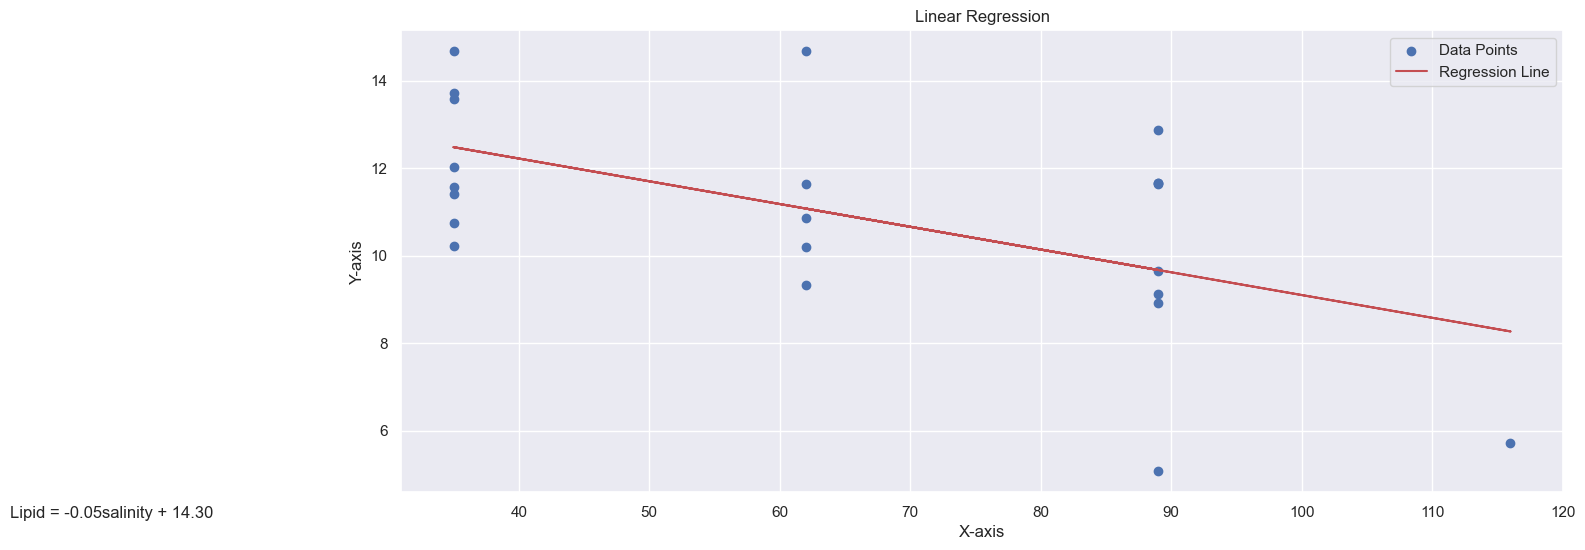

In [46]:
 results_dataframe = m
import scipy
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(results_dataframe['salinity'], results_dataframe['Lipid'])

# Create the regression line equation
equation = f'Lipid = {slope:.2f}salinity + {intercept:.2f}'

# Create a scatter plot of the data points
plt.scatter(results_dataframe['salinity'], results_dataframe['Lipid'], label='Data Points')

# Add the regression line to the plot
plt.plot(results_dataframe['salinity'], slope * results_dataframe['salinity'] + intercept, 'r', label='Regression Line')

# Add labels and title to the plot
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Linear Regression')
plt.legend()
print(equation)
# Display the equation on the plot
plt.text(1, 4, equation, fontsize=12)

# Show the plot
plt.show()

              Protein  Carbohydrate  Lipid     N     P  salinity  aeration
Protein          1.00          0.23   0.34  0.06  0.24     -0.39      0.23
Carbohydrate     0.23          1.00   0.26 -0.21  0.46     -0.35     -0.16
Lipid            0.34          0.26   1.00 -0.34  0.16     -0.56     -0.09
N                0.06         -0.21  -0.34  1.00  0.00     -0.00     -0.00
P                0.24          0.46   0.16  0.00  1.00     -0.01      0.00
salinity        -0.39         -0.35  -0.56 -0.00 -0.01      1.00      0.00
aeration         0.23         -0.16  -0.09 -0.00  0.00      0.00      1.00


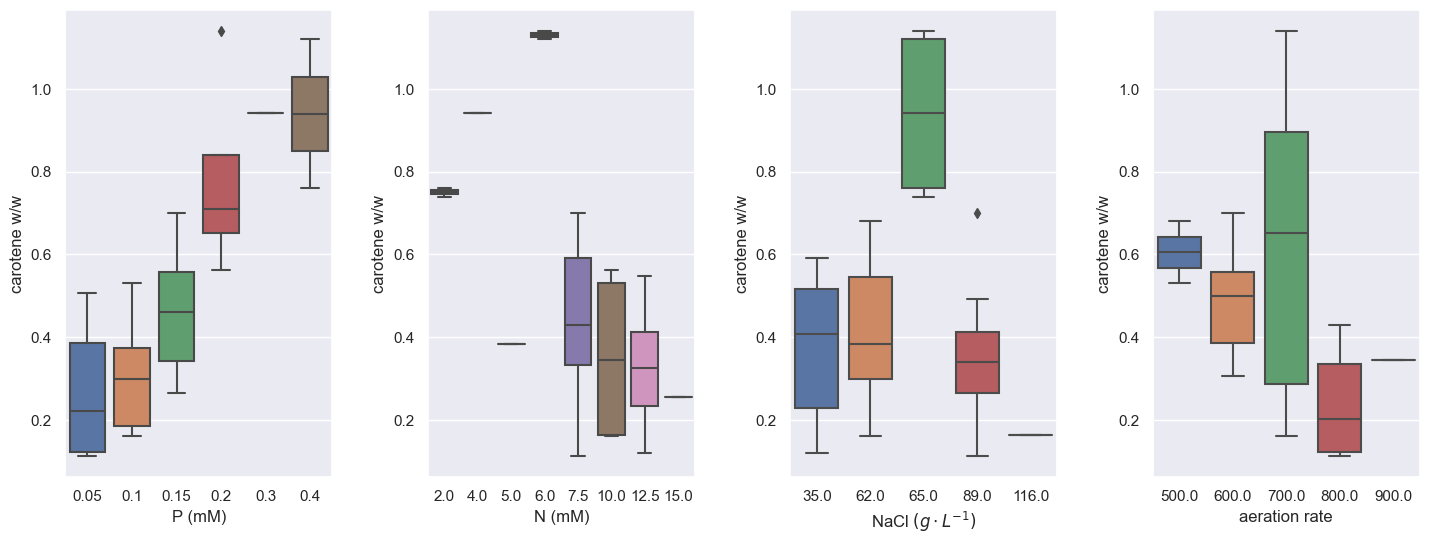

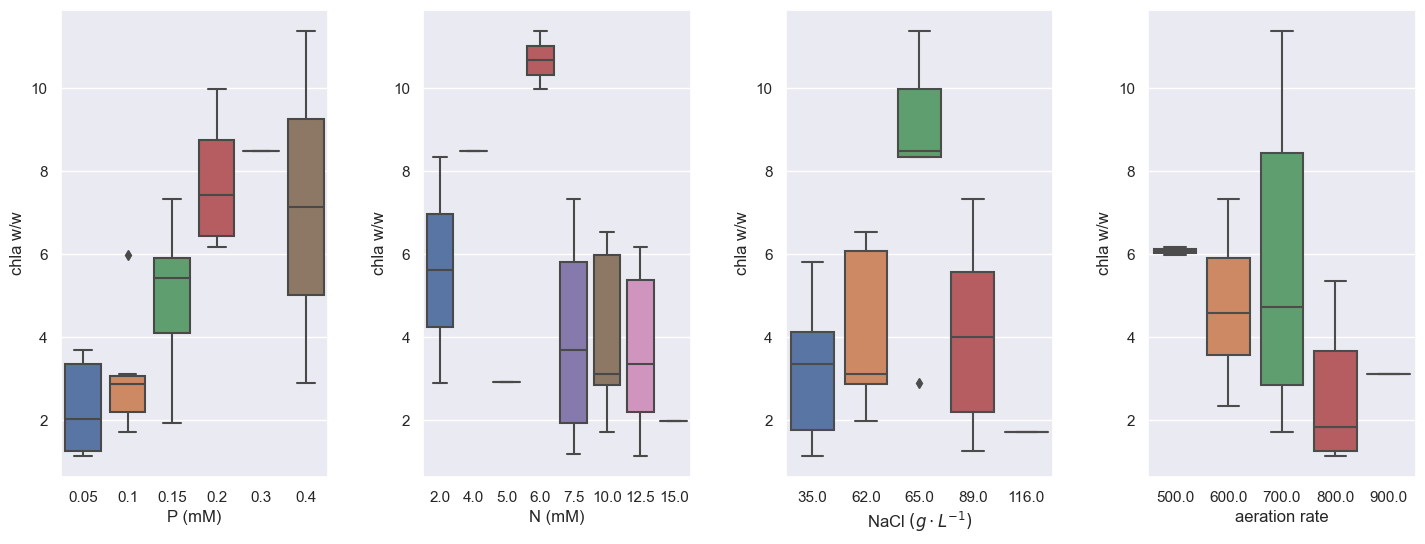

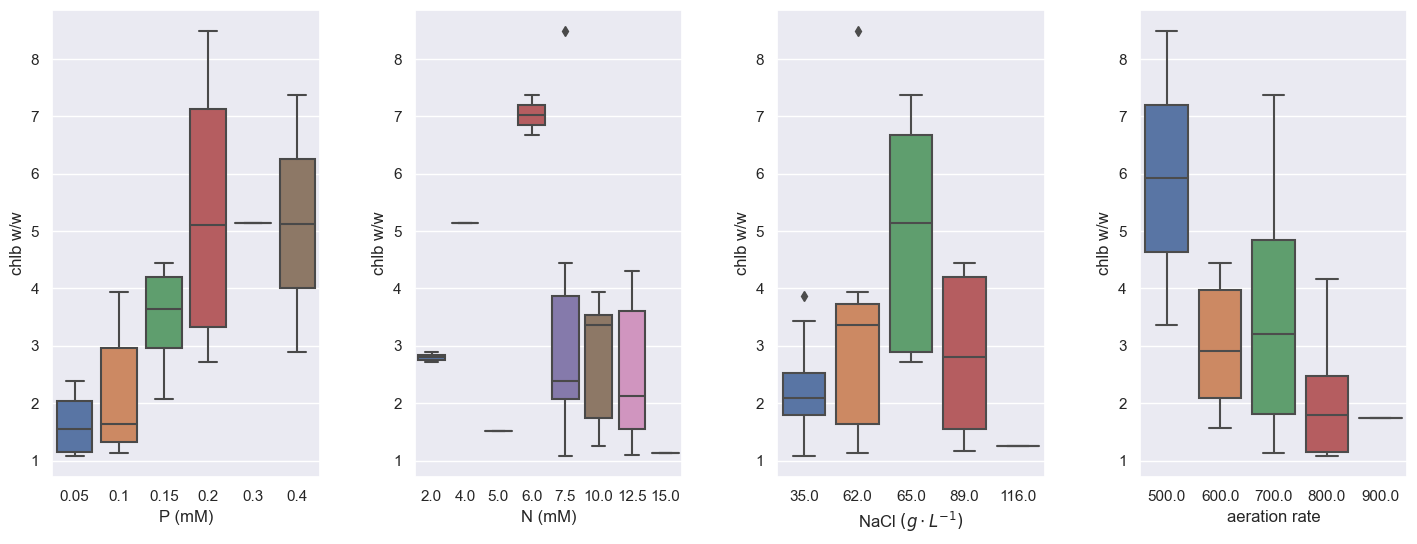

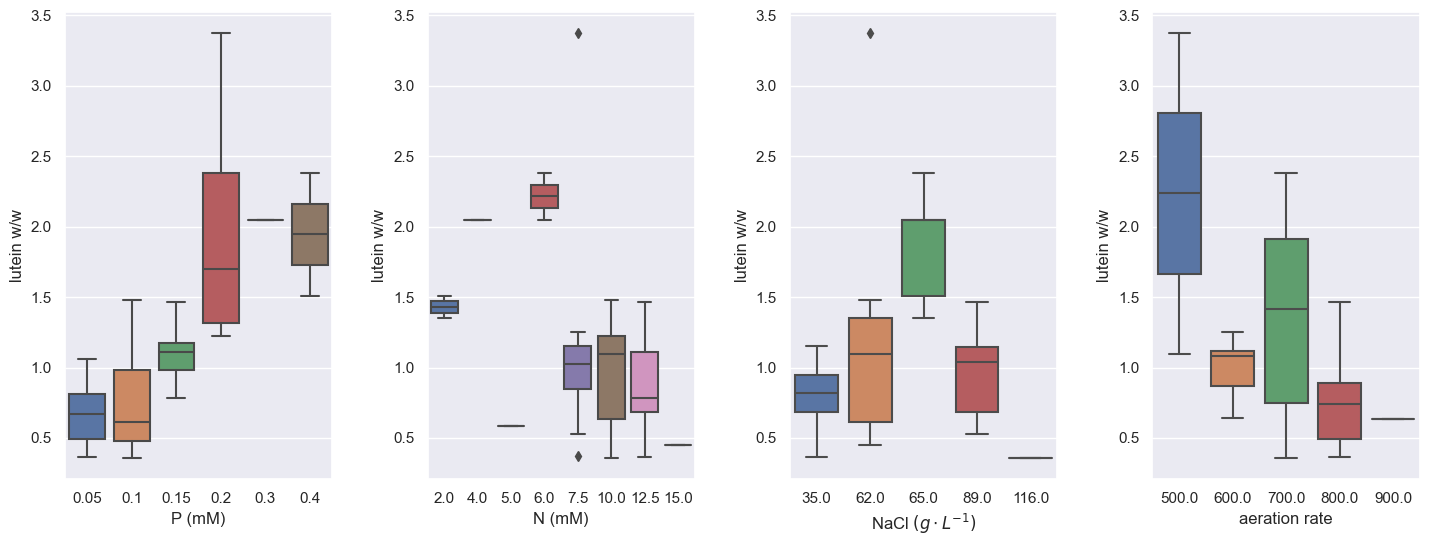

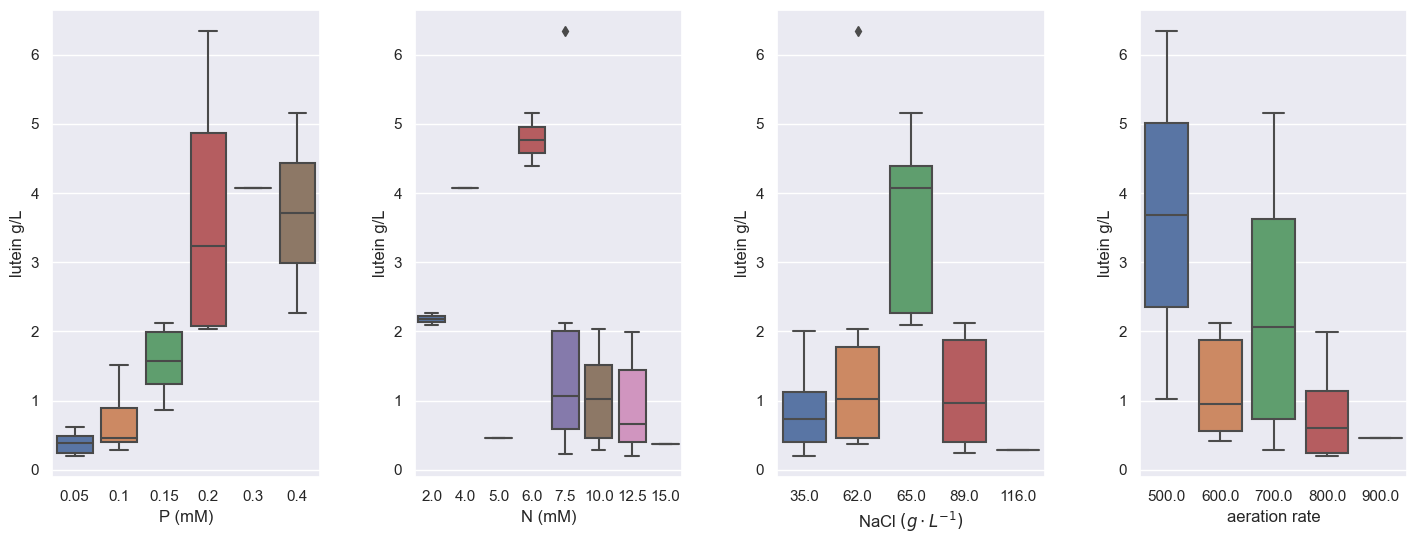

In [51]:
stats = StatisticalAnalysis(m)
cor = stats.get_correlation()

pprint(cor)

m = pd.concat([biomass.biomass_matrix['pigments'].filter(regex='.*mean.*',axis=1), matrix.conditions[["N", "P", "salinity", "aeration"]]], axis=1)
m = m.dropna()
m.rename(columns = {"B-carotene (mean)": 'carotene', "Lutein (mean)": 'lutein', "Chlorophyll a (mean)": 'chla', "Chlorophyll b (mean)": 'chlb'}, inplace=True)

m['caro_lutein'] = m['carotene']/m['lutein']


boxplot(m, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['carotene'], to_show=True, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
        , y_labels={'carotene': 'carotene w/w'})


boxplot(m, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['chla'], to_show=True, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
        , y_labels={'chla': 'chla w/w'})
boxplot(m, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['chlb'], to_show=True, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
        , y_labels={'chlb': 'chlb w/w'})

m['lutein_concentration'] = m['lutein'] * matrix.conditions['biomass']
boxplot(m, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['lutein'], to_show=True, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
        , y_labels={'lutein': 'lutein w/w'})

boxplot(m, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['lutein_concentration'], to_show=True, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
        , y_labels={'lutein_concentration': 'lutein g/L'})

In [52]:
stats = StatisticalAnalysis(m)
cor = stats.get_correlation()

print(cor)

stats.anova('P ~ chla')
stats.anova('N ~ chla')
stats.anova('salinity ~ chla')
stats.anova('aeration ~ chla')

stats.anova('P ~ chlb')
stats.anova('N ~ chlb')
stats.anova('salinity ~ chlb')
stats.anova('aeration ~ chlb')

stats.anova('P ~ carotene')
stats.anova('N ~ carotene')
stats.anova('salinity ~ carotene')
stats.anova('aeration ~ carotene')

stats.anova('P ~ lutein')
stats.anova('N ~ lutein')
stats.anova('salinity ~ lutein')
stats.anova('aeration ~ lutein')

stats.anova('P ~ caro_lutein')
stats.anova('N ~ caro_lutein')
stats.anova('salinity ~ caro_lutein')
stats.anova('aeration ~ caro_lutein')

stats.manova('salinity + aeration ~ carotene')
stats.manova('P + salinity ~ carotene')
stats.manova('N + salinity ~ carotene')
stats.manova('N + P ~ carotene')

                      lutein  chlb  chla  carotene     N     P  salinity  \
lutein                  1.00  0.95  0.73      0.75 -0.41  0.67      0.02   
chlb                    0.95  1.00  0.82      0.77 -0.30  0.64      0.05   
chla                    0.73  0.82  1.00      0.90 -0.39  0.66      0.04   
carotene                0.75  0.77  0.90      1.00 -0.57  0.78     -0.08   
N                      -0.41 -0.30 -0.39     -0.57  1.00 -0.55     -0.01   
P                       0.67  0.64  0.66      0.78 -0.55  1.00      0.00   
salinity                0.02  0.05  0.04     -0.08 -0.01  0.00      1.00   
aeration               -0.39 -0.40 -0.35     -0.36  0.03 -0.04      0.01   
caro_lutein            -0.15 -0.09  0.27      0.45 -0.25  0.19     -0.20   
lutein_concentration    0.97  0.96  0.79      0.81 -0.43  0.74      0.02   

                      aeration  caro_lutein  lutein_concentration  
lutein                   -0.39        -0.15                  0.97  
chlb                     -0